# 1. Завантаження даних

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [17]:
df = pd.read_csv('data.csv')
df.head()

,Date,Value
0,189501,26.69
1,189601,31.48
2,189701,28.17
3,189801,30.67
4,189901,29.68


In [18]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(df.describe(include='all'))
print()
print(df.dtypes)

           Date  Value
count    131.00 131.00
mean  196001.00  30.59
std     3796.05   3.06
min   189501.00  21.92
25%   192751.00  29.23
50%   196001.00  30.88
75%   199251.00  32.43
max   202501.00  38.93

Date       int64
Value    float64
dtype: object


In [19]:
df.columns = ['Date', 'Temperature']

df.Date = df.Date.floordiv(100)
print(df.head())

df.to_csv("data2.csv", index=False)


   Date  Temperature
0  1895        26.69
1  1896        31.48
2  1897        28.17
3  1898        30.67
4  1899        29.68


# 2. Регресійна пряма за допомогою Seaborn

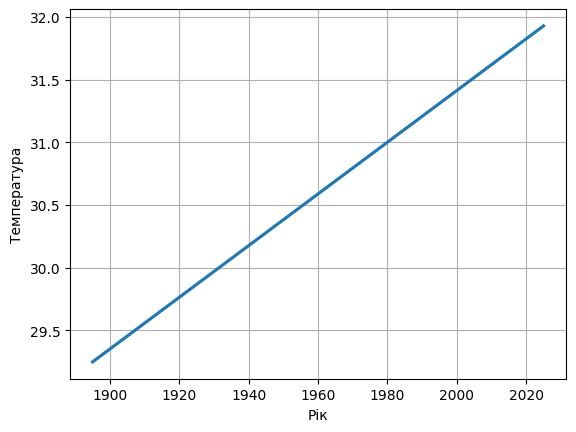

In [20]:
sns.regplot(x=df["Date"], y=df["Temperature"], scatter=False, ci=None)
plt.grid()
plt.xlabel("Рік")
plt.ylabel("Температура")
plt.show()

# 3. Прогнозування даних на 2021, 2022, 2023 та 2024 рік. 

In [21]:
linear_regression = stats.linregress(x=df.Date, y=df.Temperature)

for i in range(2021, 2025):
    print(f"{i}: {round(linear_regression.slope* i + linear_regression.intercept,2)}")      

2021: 31.85
2022: 31.87
2023: 31.89
2024: 31.91


# 4. Оцінка даних.

In [22]:
for i in range(1400, 1900, 100):
    print(f"{i}: {round(linear_regression.slope* i + linear_regression.intercept,2)}")      

1400: 19.04
1500: 21.11
1600: 23.17
1700: 25.23
1800: 27.29


# 5. Regplot Seaborn

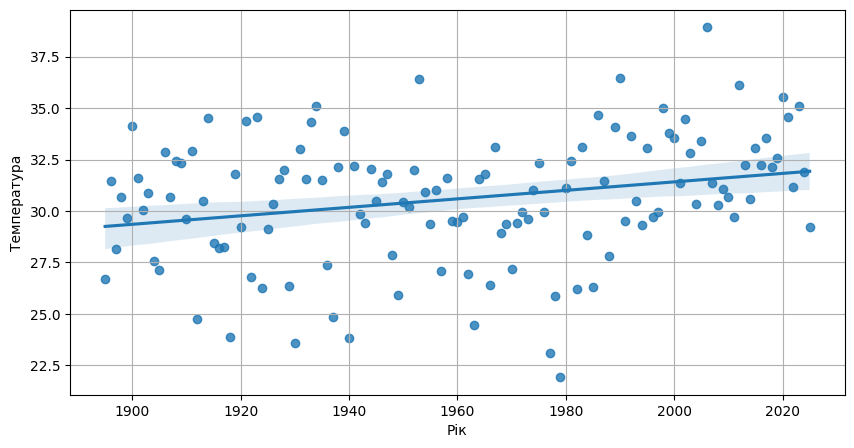

In [23]:
plt.figure(figsize=(10, 5))
sns.regplot(x=df["Date"], y=df["Temperature"])
plt.xlabel("Рік")
plt.ylabel("Температура")
plt.grid()
plt.show()

# 6. Масштабування

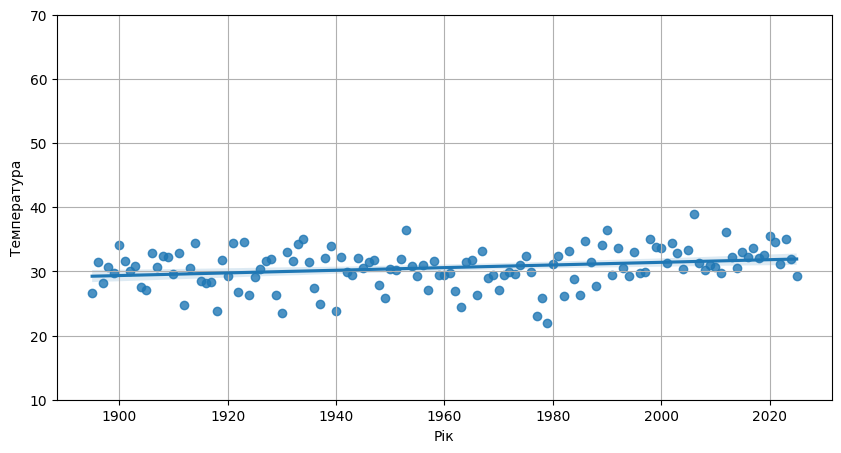

In [24]:
plt.figure(figsize=(10, 5))
sns.regplot(x=df["Date"], y=df["Temperature"])
plt.ylim(10, 70)  
plt.xlabel("Рік")
plt.ylabel("Температура")
plt.grid()
plt.show()

# 7. Порівняння отриманого прогнозу з з даними на NOAA «Climate at a Glance»

In [25]:
print(f"2021: {round(linear_regression.slope* 2021 + linear_regression.intercept,2)} vs 34.8")   
print(f"2022: {round(linear_regression.slope* 2022 + linear_regression.intercept,2)} vs 30.4")   
print(f"2023: {round(linear_regression.slope* 2023 + linear_regression.intercept,2)} vs 43.5")   
print(f"2024: {round(linear_regression.slope* 2024 + linear_regression.intercept,2)} vs 37.0")   

#Лінійна регресія припускає, що температура змінюється рівномірно з часом, однак у дійсності кліматичні процеси є значно складнішими. 
#Навіть глянувши на вихідні дані, можна помітити, що вони мають значні коливання, а не утворюють чітку пряму.

#У моделі розглядалася лише залежність температури від року, проте на клімат впливає безліч інших чинників: природні явища, 
#викиди парникових газів, сонячна активність тощо. Без урахування цих параметрів прогноз стає неточним.

2021: 31.85 vs 34.8
2022: 31.87 vs 30.4
2023: 31.89 vs 43.5
2024: 31.91 vs 37.0
